In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import time
import os
from os.path import exists

In [2]:
%matplotlib inline

# Let's get our hands dirty
We going to build classification model that is capable of handwritten digits recognition. We gona use MNIST data set. Lets explore it.

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

train_img = mnist.train.images
print "train db: {}, validation: {}  test: {}".format(train_img.shape, mnist.validation.images.shape, 
                                                      mnist.test.images.shape)
print "train db labels {}".format(mnist.train.labels.shape)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
train db: (55000, 784), validation: (5000, 784)  test: (10000, 784)
train db labels (55000, 10)


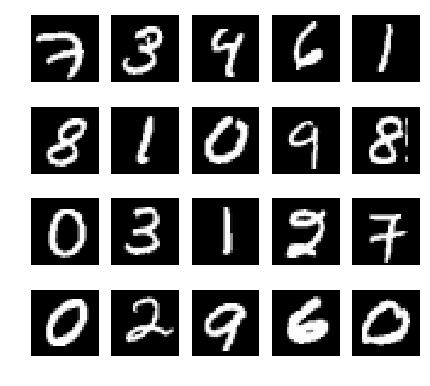

In [4]:
#Lets look at train data
plt.figure(figsize=(2. * 2.5, 2.26 * 2))
plt.title("Face completion with multi-output estimators")
           
for i in range(20):
    img = train_img[i].reshape((28,28))
    sub = plt.subplot(4,5,i+1)
    sub.axis("off")
    sub.imshow(img, cmap=plt.cm.gray, interpolation="nearest")
plt.show()

# Code challenge: spot the bug in Logistic Regression code!!!

In [6]:
tf.reset_default_graph()
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

# Step 1: Read in data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

# Step 2: create placeholders for features and labels
# X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
# y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')
X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder') 
y = tf.placeholder(tf.float32, [None, 10], name='Y_placeholder')



# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
with tf.variable_scope('my_model'):
    w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
    b = tf.Variable(tf.zeros([1, 10]), name="bias")

with tf.name_scope('my_ops'):
    # Step 4: build model
    # the model that returns the logits.
    logits = tf.matmul(X, w) + b 

with tf.name_scope('train_op'):
    # Step 5: define loss function
    # use cross entropy of softmax of logits as the loss function
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name='loss')
    loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

    # Step 6: define training op
    # using gradient descent with learning rate of 0.01 to minimize loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, y:Y_batch}) 
            total_loss += loss_batch
        print 'Average loss epoch {0}: {1}'.format(i, total_loss/n_batches)

    print 'Total time: {0} seconds'.format(time.time() - start_time)

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # We can test the model two ways: for small dataset all at once for biger we need do it by batch
    #1. All at once
    with tf.name_scope('test_op'):
#         correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
#         accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     print sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})

    #2. by batch
        n_batches = int(mnist.test.num_examples/batch_size)
        total_correct_preds = 0
        for i in range(n_batches):
            X_batch, Y_batch = mnist.test.next_batch(batch_size)
            _, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, y:Y_batch}) 
            preds = tf.nn.softmax(logits_batch)
            correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
            accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.
            total_correct_preds += sess.run(accuracy)

        print 'Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples)
    writer = tf.summary.FileWriter('./MNIST_data/test/graph', sess.graph)
    writer.close()


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Average loss epoch 0: 1.2892788147
Average loss epoch 1: 0.731931714745
Average loss epoch 2: 0.600197836653
Average loss epoch 3: 0.536738563251
Average loss epoch 4: 0.497671618606
Average loss epoch 5: 0.471199354439
Average loss epoch 6: 0.45149856382
Average loss epoch 7: 0.43610518351
Average loss epoch 8: 0.423453294592
Average loss epoch 9: 0.41329353631
Average loss epoch 10: 0.404241379116
Average loss epoch 11: 0.396733892582
Average loss epoch 12: 0.390273983141
Average loss epoch 13: 0.384668713579
Average loss epoch 14: 0.379304208018
Average loss epoch 15: 0.374681006014
Average loss epoch 16: 0.370363724954
Average loss epoch 17: 0.366507528441
Average loss epoch 18: 0.363026009434
Average loss epoch 19: 0.359583337824
Average loss epoch 20: 0.356821901836
Average loss epoch 21: 

# Second try and logistic regression evolved to neural network



In [19]:
tf.reset_default_graph()
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30

# Step 1: Read in data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder') 
y = tf.placeholder(tf.float32, [None, 10], name='Y_placeholder')

# Step 2: Define model
# Variable and name scopes, helps better structure our models
with tf.variable_scope('my_model'):
    w = tf.Variable(tf.random_normal(shape=[784, 128], stddev=0.01), name='W0')
    b = tf.Variable(tf.zeros([1, 128]), name="b0")
    with tf.name_scope('my_ops'):
        pred =  tf.nn.relu(tf.matmul(X, w) + b)

    w1 = tf.Variable(tf.random_normal(shape=[128, 10], stddev=0.01), name='W1')
    b1 = tf.Variable(tf.zeros([1, 10]), name="b1")
    with tf.name_scope('my_ops'):
        logits =  tf.matmul(pred, w1) + b1

    print "INFO: global variables"
    for i in tf.global_variables():
        print i.op.name, i.get_shape()

# Step 3: Define training ops
with tf.name_scope('train_op'):
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name='loss')
    loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, y:Y_batch}) 
            total_loss += loss_batch
        print 'Average loss epoch {0}: {1}'.format(i, total_loss/n_batches)

    print 'Total time: {0} seconds'.format(time.time() - start_time)
    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # We can test the model two ways: for small dataset all at once for biger we need do it by batch
    
    with tf.name_scope('test_op'):
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        acc =  sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})

    print 'Accuracy {0}'.format(acc)
    writer = tf.summary.FileWriter('./MNIST_data/test/graph, sess.graph)
    writer.close()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO: global variables
my_model/W0 (784, 128)
my_model/b0 (1, 128)
my_model/W1 (128, 10)
my_model/b1 (1, 10)
Average loss epoch 0: 2.22554425815
Average loss epoch 1: 1.54468943411
Average loss epoch 2: 0.85266346045
Average loss epoch 3: 0.616764632347
Average loss epoch 4: 0.514196301743
Average loss epoch 5: 0.456699790724
Average loss epoch 6: 0.419851628564
Average loss epoch 7: 0.394577542246
Average loss epoch 8: 0.37542702737
Average loss epoch 9: 0.360566297924
Average loss epoch 10: 0.348560312168
Average loss epoch 11: 0.338425017216
Average loss epoch 12: 0.329327114743
Average loss epoch 13: 0.322021806921
Average loss epoch 14: 0.314596724955
Average loss epoch 15: 0.308453202942
Average loss epoch 16: 0.302141304338
Average loss epoch 17: 0.296854825321
Average loss epoch 18: 0.29

# Saving model
It's all good, but how we could, save our progress? Use **tf.train.Saver** that saves graph’s variables in binary files. Saver create checkpoint files that only save variables, not graph. Checkpoints map variable names to tensors on load.

Let's try to train model, save it and reuse it!

In [13]:
tf.reset_default_graph()
n_epochs = 5

# Step 1: Read in data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder') 
y = tf.placeholder(tf.float32, [None, 10], name='Y_placeholder')

# Step 4: Define training ops
with tf.variable_scope('my_model'):
    w = tf.Variable(tf.random_normal(shape=[784, 128], stddev=0.01), name='W0')
    b = tf.Variable(tf.zeros([1, 128]), name="b0")
    with tf.name_scope('my_ops'):
        pred =  tf.nn.relu(tf.matmul(X, w) + b)

    w1 = tf.Variable(tf.random_normal(shape=[128, 10], stddev=0.01), name='W1')
    b1 = tf.Variable(tf.zeros([1, 10]), name="b1")
    with tf.name_scope('my_ops'):
        logits =  tf.matmul(pred, w1) + b1

#We need to know whick iteration we are executing
global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

# Step 3: Define training ops
with tf.name_scope('train_op'):
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y, name='loss')
    loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch
    #We pass global_step to optimizer
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss, global_step=global_step)

# Step 4: We create saver object
saver = tf.train.Saver()

# Step 5: We create dir where to store checkpoint files
save_dir = './MNIST_data/test/nn/'
if not exists(save_dir):
    os.mkdir(save_dir)
    
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
    
    start_time = time.time()
    sess.run(tf.global_variables_initializer())
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, y:Y_batch}) 
            total_loss += loss_batch
        print 'Average loss epoch {0}: {1}'.format(i, total_loss/n_batches)
        print 'Global step: ', global_step.eval()
    
        #We save model variables to checkpoint_files after every epoch
        saver.save(sess, save_dir+'model', global_step=global_step)
    
    print 'Total time: {0} seconds'.format(time.time() - start_time)
    print('Optimization Finished!') # should be around 0.35 after 25 epochs
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Average loss epoch 0: 2.24213921996
Global step:  429
Average loss epoch 1: 1.62041481614
Global step:  858
Average loss epoch 2: 0.880781664576
Global step:  1287
Average loss epoch 3: 0.622332877212
Global step:  1716
Average loss epoch 4: 0.513954840201
Global step:  2145
Total time: 5.74288702011 seconds
Optimization Finished!


# Let's load saved model
As you look to ./MNIST_data/test/nn you will find bunch of files. One we are interested is **checkpoint** look at it.
It contains list of our saved models. So lets try to load model from checkpoint.

There is two ways to load chechpoints
1. Define model, and do restore operatoin
2. Load model from checkpoint files

We gona use option number 1. So lets do it


In [14]:
tf.reset_default_graph()
n_epochs = 5

# Step 1: Read in data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

X = tf.placeholder(tf.float32, [None, 784], name='X_placeholder') 
y = tf.placeholder(tf.float32, [None, 10], name='Y_placeholder')

# Step 2: Define model
with tf.variable_scope('my_model'):
    w = tf.Variable(tf.random_normal(shape=[784, 128], stddev=0.01), name='W0')
    b = tf.Variable(tf.zeros([1, 128]), name="b0")
    with tf.name_scope('my_ops'):
        pred =  tf.nn.relu(tf.matmul(X, w) + b)

    w1 = tf.Variable(tf.random_normal(shape=[128, 10], stddev=0.01), name='W1')
    b1 = tf.Variable(tf.zeros([1, 10]), name="b1")
    with tf.name_scope('my_ops'):
        logits =  tf.matmul(pred, w1) + b1

# Step 3: Define test ops
with tf.name_scope('test_op'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
# Step 4: Define saver and load last checkpoint, we specify checkpoint dir
saver = tf.train.Saver()  
ckpt = tf.train.get_checkpoint_state('./MNIST_data/test/nn')

print "INFO: all chekpoint list: ",ckpt.all_model_checkpoint_paths
print "INFO: last checkpoint: ", ckpt.model_checkpoint_path
gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:
#Step 5: if you wana be convinced that restore operation do work uncoment code below
    """
    # We initialize variables and check they values
    sess.run(tf.global_variables_initializer())
    for i in tf.global_variables():
        print "Before: var: {}, shape: {}, mean: {}".format(i.op.name, i.get_shape(), tf.reduce_mean(i).eval())
    
    #We do restore and check again
    saver.restore(sess, ckpt.model_checkpoint_path)
    for i in tf.global_variables():
        print "After: var: {}, shape: {}, mean: {}".format(i.op.name, i.get_shape(), tf.reduce_mean(i).eval())
    """ 
    
    print "INFO: restoring model: ", ckpt.model_checkpoint_path
    saver.restore(sess, ckpt.model_checkpoint_path)
    acc =  sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})
    print 'Accuracy {0}'.format(acc)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO: all chekpoint list:  [u'./MNIST_data/test/nn/model-429', u'./MNIST_data/test/nn/model-858', u'./MNIST_data/test/nn/model-1287', u'./MNIST_data/test/nn/model-1716', u'./MNIST_data/test/nn/model-2145']
INFO: last checkpoint:  ./MNIST_data/test/nn/model-2145
INFO: restoring model:  ./MNIST_data/test/nn/model-2145
Accuracy 0.882700026035


# So you now know kung fu :D

lets talk about **Data Readers** - Ops that return different values every time you call them(Think Python’s generator). You now that using feed you can inject data to graph. There is another way. For example you have directory with images and want that tensorflow would load them. No need of some pesky numpy ;D.
```python
tf.TextLineReader
Outputs the lines of a file delimited by newlines E.g. text files, CSV files

tf.FixedLengthRecordReader
Outputs the entire file when all files have same fixed lengths
E.g. each MNIST file has 28 x 28 pixels, CIFAR-10 32 x 32 x 3

tf.WholeFileReader
Outputs the entire file content

tf.TFRecordReader
Reads samples from TensorFlow’s own binary format (TFRecord)

tf.ReaderBase
To allow you to create your own readers
```

Let me present sample code.

# Blueprint of Data Readers usage

```python
img_shape = [128, 128, 3]

img = tf.convert_to_tensor(files, dtype=tf.string) #files - list of files in some dir
lab = tf.convert_to_tensor(labels, dtype=tf.int32) #labels list of labels

#Step 1: Contruct queue, that will produce (img_file, label) pairs
filename_queue = tf.train.slice_input_producer([img, lab], num_epochs=num_epochs, seed=random_state, capacity=500, shuffle=False)

#Step 2: Construc ops to process single (image, label) pair
image = tf.read_file(filename_queue[0])
decoded_image = tf.image.decode_jpeg(image, channels=3)
decoded_image.set_shape(img_shape)
image = tf.to_float(decoded_image)
label = tf.cast(filename_queue[1], tf.int32)

#Step 3: Construc queue that will suply our model with batch'es of data
images_batch, label_batch = tf.train.batch([image, label],
                                     batch_size=batch_size,
                                     capacity=capacity, num_threads=num_threads)

#Step 4: Define model, and pass images to it, remember, that in previos model we used plaseholder as imput to model
logits = my_model(images_batch)

gpu_opts = tf.GPUOptions(per_process_gpu_memory_fraction=0.05)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_opts)) as sess:

#Step 5: Create Coordinator, and run you queues
    coord = tf.train.Coordinator()
    tf.train.start_queue_runners(sess=sess, coord=coord)
    
    try:
        while not coord.should_stop():
#Step 6: Run training ops
            pred = sess.run(logits)
        except tf.errors.OutOfRangeError:
            print('Done training -- epoch limit reached')
        finally:
            coord.request_stop()
```